# MANIPULATING NUMPY ARRAYS

As earlier stated in the introduction section, NumPy ndarray is a fast and flexible multidimensional container for large and homogenous data sets. To leverage this flexibity there are numerous operations avaliable to maximize the utility of NumPy arrays, the following subtopics will cover these operations:

+ [Indexing and slicing / fancy indexing](#indexing)
+ [Boolen Arrays, conditional selection and masking](#boolean)
+ [View](#view)
+ [Manipulating Arrays](#manipulating)
+ [Axis Ambiguity](#Axis)


<a id='indexing'></a>

### Indexing, slicing and fancy indexing
Elements and sections of NumPy arrays are accessed using the square bracket and colon notation just Python List objects, within the square bracket, the format for the selection or slice is specified based on what we want to select or slice.

conventions:

1. ndarray selection ``[m:n:p] ``
2. positsive integers are used to index elements from the begining of the array  ``(m)``
3. The very first element is at index position ``0``
4. Negative integers begining from  ``-1`` are used to select items from the end of the array. the last element is at index ``-1``
5. When slicing the stop element is excluded ``(n-1)``
6. ``p`` refers to the increment, if it is negative the array will be reversed.
7. For two dimension arrays, multidimentional ndarray selection ``[m:n:p,m:n:p]``

Positive Index | 0 | 1 | 2 | 3 | 4 | 5 | 6 |
:-:| :-: | :-:| :-: | :-: | :-: | :-: | :-: |
**ndarray** | 5 | 10 | 15 | 20 | 25 | 30 | 35 |
**Negative Index** | -7 | -6 | -5 | -4 | -3 | -2 | -1 |

In [1]:
import numpy as np
arr = np.arange(0,36,5)

In [2]:
arr

array([ 0,  5, 10, 15, 20, 25, 30, 35])

In [3]:
# Positive indexing
arr[0]

0

In [4]:
# Negative Indexing
arr[-1]

35

In [5]:
# The index  on last position is n-1
arr[6]

30

**Indexing Tips:**

Expression | Description
:-|:-
**arr[m]** | select element at index m, where m is an integer counting from first element as 0
**arr[-m]** | select the nth element from the end where m is a negative integer counting from last element as -1
**arr[m:n]** | select element from m to index (n-1)
**arr[0:-1] or arr[:]** |  select all elements in the array
**arr[:n]** | select from begining at index 0 to index (n-1)
**arr[m:] or arr[m:-1]** | select from index m to the last element
**arr[::-1]** | select all elements in reversed order
**arr[row,column]**| 2D array indexing where row and columns are selected respectively

In [6]:
arr

array([ 0,  5, 10, 15, 20, 25, 30, 35])

In [7]:
# selecting from index 1 to the end exluding the stop index
arr[1:-1]

array([ 5, 10, 15, 20, 25, 30])

In [8]:
# slicing from start index to 7-1 = 6index
arr[:7]

array([ 0,  5, 10, 15, 20, 25, 30])

In [9]:
# Slicing from -5 index to the end
arr[-5:]

array([15, 20, 25, 30, 35])

In [10]:
# Multidimensional Arrays
f = lambda m,n: n + 10 * m

In [11]:
arr_2 = np.fromfunction(f,(6,6))

In [12]:
arr_2

array([[ 0.,  1.,  2.,  3.,  4.,  5.],
       [10., 11., 12., 13., 14., 15.],
       [20., 21., 22., 23., 24., 25.],
       [30., 31., 32., 33., 34., 35.],
       [40., 41., 42., 43., 44., 45.],
       [50., 51., 52., 53., 54., 55.]])

In [13]:
# selecting the first 3 rows
arr_2[0:3]

array([[ 0.,  1.,  2.,  3.,  4.,  5.],
       [10., 11., 12., 13., 14., 15.],
       [20., 21., 22., 23., 24., 25.]])

In [14]:
# Selecting the first 3 columns 
arr_2[:,0:3]

array([[ 0.,  1.,  2.],
       [10., 11., 12.],
       [20., 21., 22.],
       [30., 31., 32.],
       [40., 41., 42.],
       [50., 51., 52.]])

In [15]:
# selecting items from the middle of the array
arr_2[1:5,1:5]

array([[11., 12., 13., 14.],
       [21., 22., 23., 24.],
       [31., 32., 33., 34.],
       [41., 42., 43., 44.]])

In [16]:
# selecting items using negative indexing
arr_2[2:-1,1:-1]

array([[21., 22., 23., 24.],
       [31., 32., 33., 34.],
       [41., 42., 43., 44.]])

In [17]:
# Reversing the rows and columns
arr_2[::-1,::-1]

array([[55., 54., 53., 52., 51., 50.],
       [45., 44., 43., 42., 41., 40.],
       [35., 34., 33., 32., 31., 30.],
       [25., 24., 23., 22., 21., 20.],
       [15., 14., 13., 12., 11., 10.],
       [ 5.,  4.,  3.,  2.,  1.,  0.]])

**Fancy Indexing**
Previously indexing was done with integers in square brackets and colon to select elements or sections, Numpy provides a flexible approach to index by using either an array, list  or sequence of integers whose values select elements in the array we desire to index. lets explore an example for clarity

In [18]:
arr_2

array([[ 0.,  1.,  2.,  3.,  4.,  5.],
       [10., 11., 12., 13., 14., 15.],
       [20., 21., 22., 23., 24., 25.],
       [30., 31., 32., 33., 34., 35.],
       [40., 41., 42., 43., 44., 45.],
       [50., 51., 52., 53., 54., 55.]])

In [19]:
# Selecting particular rows
arr_2[[0,2,4]]

array([[ 0.,  1.,  2.,  3.,  4.,  5.],
       [20., 21., 22., 23., 24., 25.],
       [40., 41., 42., 43., 44., 45.]])

In [20]:
# selecting particular columns
arr_2[:,[1,3,5]]

array([[ 1.,  3.,  5.],
       [11., 13., 15.],
       [21., 23., 25.],
       [31., 33., 35.],
       [41., 43., 45.],
       [51., 53., 55.]])

In [21]:
#selecting particular elements
arr_2[[2,4,5],[1,2,3]]

array([21., 42., 53.])

<a id='boolean'></a>

### Boolen Arrays, conditional selection and masking
Another variant of selection in NumPy arrays is the use Boolean-valued index arrays. In this case a compairson expression is set up between a scalar and array or two arrays. each element evaluates to a boolean (with True or False)  and selection is based on the elements that evaluate to true. (That is, if element n in the indexing
array of Boolean values is True, then element n is selected from the indexed array.) If the
value is False, then element n is not selected. This index method is handy when filtering out
elements from an array.we will explore some examples, but before the lets run tghrough the guidelines:


1. Use compairson operator to compare array to values ( >, <, !=, >= , <= ) eg.  **data > 100**
2. When you have multiple conditions each condition should be put in parenthesesㅤeg. **(data > 100) & (data < 1000)**
3. Use **&** to represent **AND**  ㅤeg. **(data > 100) & (data < 1000)**  
4. Use pipe operator **( | )** to represent **OR** ㅤeg. **(data < 20) | (data < 50)**
5. Assign the mask to a variable ㅤㅤㅤㅤㅤeg. **mask = (data < 20) | (data < 50)**
6. Cast the mask (conditions) to the main arrayㅤㅤㅤeg. **data[mask]**

compairson operators:

Operator | Description
:- | :-
== | Equal to
!= | Not Equal to
< | Less than
<= | Less than or equal to
> | Greater than
>= | Greater than or equal to



In [22]:
data = np.random.randint(1,1000,30)
data

array([680, 332,  21, 319, 990, 832, 774, 690, 139, 568, 868, 204, 250,
       641, 555, 136, 940, 557, 174, 705, 586, 731, 594,  41, 113, 147,
       290, 916, 414, 378])

In [23]:
# Boolean selection of data greater than 100
data > 100

array([ True,  True, False,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True, False,  True,  True,  True,
        True,  True,  True])

In [24]:
# masking the array
data[data> 100]

array([680, 332, 319, 990, 832, 774, 690, 139, 568, 868, 204, 250, 641,
       555, 136, 940, 557, 174, 705, 586, 731, 594, 113, 147, 290, 916,
       414, 378])

In [25]:
# Using AND condition
mask = (data > 100) & (data < 1000)

In [26]:
# Conditional Selection
data[mask]

array([680, 332, 319, 990, 832, 774, 690, 139, 568, 868, 204, 250, 641,
       555, 136, 940, 557, 174, 705, 586, 731, 594, 113, 147, 290, 916,
       414, 378])

In [27]:
#using OR condition
mask = (data < 20) | (data < 50)

In [28]:
# Conditional Selection
data[mask]

array([21, 41])

<a id='view'></a>

### View
At this point it is important to note that when you select elements from an array and assign them to a value, this value is also assigned to the main array, the selected items serve as a view to the main array. simply put, array slices return views rather than copies of the array data. The down side of this is that we can loose information from our array. In such conditions it is advisable to first make a copy of the array before selecting and assigning values to them, lets explore some examples:


In [29]:
arr_5 = data.reshape(5,6)
arr_5

array([[680, 332,  21, 319, 990, 832],
       [774, 690, 139, 568, 868, 204],
       [250, 641, 555, 136, 940, 557],
       [174, 705, 586, 731, 594,  41],
       [113, 147, 290, 916, 414, 378]])

In [30]:
# Assigning a value  to a selection 
arr_5[0,:] = 100

In [31]:
# Selected items assigned to 100 have been broadcasted to the main array
arr_5

array([[100, 100, 100, 100, 100, 100],
       [774, 690, 139, 568, 868, 204],
       [250, 641, 555, 136, 940, 557],
       [174, 705, 586, 731, 594,  41],
       [113, 147, 290, 916, 414, 378]])

In [32]:
# makin a copy of the array
arr_5_copy = arr_5.copy()

In [33]:
arr_5_copy 


array([[100, 100, 100, 100, 100, 100],
       [774, 690, 139, 568, 868, 204],
       [250, 641, 555, 136, 940, 557],
       [174, 705, 586, 731, 594,  41],
       [113, 147, 290, 916, 414, 378]])

In [34]:
arr_5_copy[0,:]

array([100, 100, 100, 100, 100, 100])

In [35]:
# Assigning values to a selection
arr_5_copy[0,:] = 200

In [36]:
# The main array was unaffected by the assignment made to the copy
arr_5

array([[100, 100, 100, 100, 100, 100],
       [774, 690, 139, 568, 868, 204],
       [250, 641, 555, 136, 940, 557],
       [174, 705, 586, 731, 594,  41],
       [113, 147, 290, 916, 414, 378]])

In [37]:
# The assigned value was reflected on the copy
arr_5_copy

array([[200, 200, 200, 200, 200, 200],
       [774, 690, 139, 568, 868, 204],
       [250, 641, 555, 136, 940, 557],
       [174, 705, 586, 731, 594,  41],
       [113, 147, 290, 916, 414, 378]])

<a id='manipulating'></a>  

### Manipulating Arrays
while working with arrays there are situations where we need to reconfigure their arrangements< transform or even combine arrays together. Numpy provides functions for this purpose, the table below presents functions we can utilize:

Function | Description
:- | :-
np.reshape(a, newshape) or np.ndarray.reshape() | Gives a new shape to an array without changing its data
np.resize(d, newshape) | Return a new array with the specified shape, can change the data
np.ndarray.flatten() | creates a copy of an N dimensional array and colapses it to a one dimensional array
np.transpose(a, axes) or np.ndarray.T() | Reverse or permute the axes of an array; returns the modified array
np.hstack(tup) | Stack arrays in sequence horizontally (column wise
np.vstack(tup) | Stack arrays in sequence vertically (row wise)
np.concatenate((a1, a2, ...), axis) | Join a sequence of arrays along an existing axis.
np.copy(a) | Return an array copy of the given object
np.ndarray.astype() | Copy of the array, cast to a specified type.   
np.sort(a, axis, kind) | Return a sorted copy of an array.

In [38]:
arr_3 = np.arange(0,25)

In [39]:
# changing the shape of array
reshaped_arr = arr_3.reshape((5,5))

In [40]:
reshaped_arr

array([[ 0,  1,  2,  3,  4],
       [ 5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14],
       [15, 16, 17, 18, 19],
       [20, 21, 22, 23, 24]])

In [41]:
arr_4 = np.arange(0,9).reshape((3,3))

In [42]:
arr_4

array([[0, 1, 2],
       [3, 4, 5],
       [6, 7, 8]])

In [43]:
# using flat function to make 2  dimension array to  1 dimension
flat_array =arr_4.flatten()

In [44]:
flat_array

array([0, 1, 2, 3, 4, 5, 6, 7, 8])

In [45]:
# Transposing array
transposed_arr= arr_4.T

In [46]:
transposed_arr

array([[0, 3, 6],
       [1, 4, 7],
       [2, 5, 8]])

In [47]:
arr_4

array([[0, 1, 2],
       [3, 4, 5],
       [6, 7, 8]])

In [48]:
# stacking arrays horizontally
np.hstack((arr_4,transposed_arr))

array([[0, 1, 2, 0, 3, 6],
       [3, 4, 5, 1, 4, 7],
       [6, 7, 8, 2, 5, 8]])

In [49]:
#stacking arrays vertically
np.vstack((arr_4,transposed_arr))

array([[0, 1, 2],
       [3, 4, 5],
       [6, 7, 8],
       [0, 3, 6],
       [1, 4, 7],
       [2, 5, 8]])

In [50]:
# Using concatenate function to merge Two arrays along the rows
np.concatenate((arr_4,transposed_arr), axis=0)

array([[0, 1, 2],
       [3, 4, 5],
       [6, 7, 8],
       [0, 3, 6],
       [1, 4, 7],
       [2, 5, 8]])

In [51]:
# Using concatenate function to merge arrays along the columns
concat_arr = np.concatenate((arr_4,transposed_arr), axis=1)

In [52]:
concat_arr

array([[0, 1, 2, 0, 3, 6],
       [3, 4, 5, 1, 4, 7],
       [6, 7, 8, 2, 5, 8]])

In [53]:
# copying arrays
copied_arr = np.copy(concat_arr)

In [54]:
copied_arr

array([[0, 1, 2, 0, 3, 6],
       [3, 4, 5, 1, 4, 7],
       [6, 7, 8, 2, 5, 8]])

In [55]:
# Changing the data type of array elements
float_arr = copied_arr.astype(np.float)

In [56]:
float_arr

array([[0., 1., 2., 0., 3., 6.],
       [3., 4., 5., 1., 4., 7.],
       [6., 7., 8., 2., 5., 8.]])

In [57]:
# sorting arrays by each columns on the 1 axis (along the rows)
sort_arr = np.sort(float_arr, axis=1)

In [58]:
sort_arr

array([[0., 0., 1., 2., 3., 6.],
       [1., 3., 4., 4., 5., 7.],
       [2., 5., 6., 7., 8., 8.]])

#### Resize Vs Reshape
While working with arrays the need will arise to re configure the shape or size of your array, at this point it is importand to distinguish between size and shape of the array.

+ **Size** referes to the number of elements in an array
+ **shape** relates to the size of the dimensions of an N-dimensional array.

**resizing** will then return a new array that has the shape that you passed to the np.resize() function. If you pass your original array together with the new dimensions, and if that new array is larger than the one that you originally had, the new array will be filled with copies of the original array that are repeated as many times as is needed.
However, if you pass in a new shape that is smaller in dimensions the data in the array will be truncated to meet the specified dimension.*

**reshaping** means that you give a new shape to an array without changing its data. The key to reshaping is to make sure that the total size of the new array is unchanged. 

**NB** The key difference between them is that while the resize function alter the size of data in the array, the reshape function doesnt alter the size of the array in general, but changes the size of the dimensions. Lets explore some examples for clarity:

In [59]:
data = np.array([[1,2,3,4],[100,200,300,400],[1000,2000,3000,4000]])

In [60]:

data

array([[   1,    2,    3,    4],
       [ 100,  200,  300,  400],
       [1000, 2000, 3000, 4000]])

In [61]:
# The shape of the array
data.shape

(3, 4)

In [62]:
# The size of the array
data.size

12

In [63]:
# Reshaping the array
data.reshape((2,6))

array([[   1,    2,    3,    4,  100,  200],
       [ 300,  400, 1000, 2000, 3000, 4000]])

In [64]:
# Resizing the array with a larger dimension
resize_data = np.resize(data,(5,5))
resize_data

array([[   1,    2,    3,    4,  100],
       [ 200,  300,  400, 1000, 2000],
       [3000, 4000,    1,    2,    3],
       [   4,  100,  200,  300,  400],
       [1000, 2000, 3000, 4000,    1]])

In [65]:
# New shape(larger)
resize_data.shape

(5, 5)

In [66]:
# New size(smaller)
resize_data.size

25

In [67]:
# Resizing the array with a smaller dimension
resize_data_2 = np.resize(data,(3,3))
resize_data_2

array([[   1,    2,    3],
       [   4,  100,  200],
       [ 300,  400, 1000]])

In [68]:
# New shape (smaller)
resize_data_2.shape

(3, 3)

In [69]:
# New size(smaller)
resize_data_2.size

9

<a id='Axis'></a>  

### Axis Ambiguity
Axes are defined for arrays with more than one dimension. A 2-dimensional array has two corresponding axes: the first running vertically downwards across rows (axis 0), and the second running horizontally across columns (axis 1).

*It's perhaps simplest to remember it as **0=down and 1=across.** *

This means:
+ Use axis=0 to apply a method down each column, or to the row labels (the index).
+ Use axis=1 to apply a method across each row, or to the column labels.

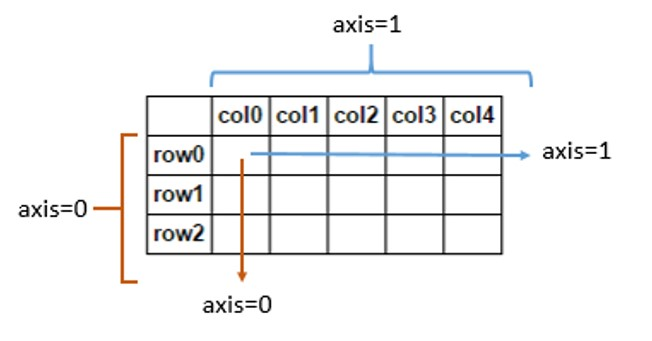